In [1]:
from sklearn.model_selection import cross_val_score
from sklearn import datasets
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn import metrics
from sklearn.ensemble import VotingClassifier

import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
diabetes = datasets.load_diabetes()
X = diabetes['data']
target = diabetes['target']
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

(array([38., 80., 68., 62., 50., 41., 38., 42., 17.,  6.]),
 array([ 25. ,  57.1,  89.2, 121.3, 153.4, 185.5, 217.6, 249.7, 281.8,
        313.9, 346. ]),
 <BarContainer object of 10 artists>)

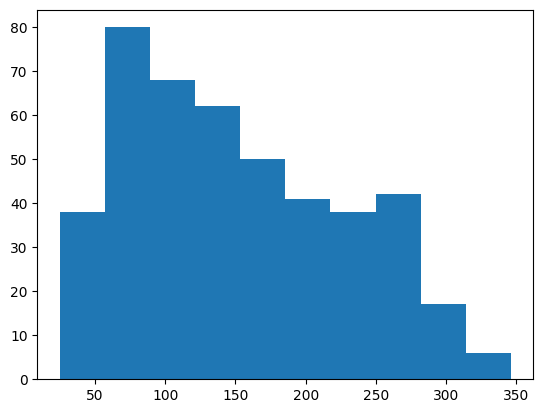

In [4]:
plt.hist(target)

### Discretize the output to create binary outcome

In [5]:
y = np.where(target > 150, 1, 0)
y

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.33, random_state = 42)

### Try different models

In [7]:
gnb = GaussianNB()
scores = cross_val_score(gnb, X_train, y_train, cv = 5)
scores.mean()

0.6959887005649718

In [8]:
dtree = DecisionTreeClassifier(random_state = 0)
scores = cross_val_score(dtree, X_train, y_train, cv = 5)
scores.mean()

0.6384180790960452

In [9]:
logreg = LogisticRegression(random_state = 0)
scores = cross_val_score(logreg, X_train, y_train, cv = 5)
scores.mean()

0.7028813559322035

In [10]:
perceptron = Perceptron(random_state = 0)
scores = cross_val_score(perceptron, X_train, y_train, cv = 5)
scores.mean()

0.6388135593220339

# Adaboost

### Deault AdaBoost

In [11]:
adaboost = AdaBoostClassifier(n_estimators = 100, random_state = 0)
scores = cross_val_score(adaboost, X_train, y_train, cv = 5)
scores.mean()

0.6587570621468927

### AdaBoost with Decision tree

In [12]:
adaboost = AdaBoostClassifier(estimator = DecisionTreeClassifier(max_depth = 1, random_state = 0), 
                              n_estimators = 100, 
                              random_state = 0)
scores = cross_val_score(adaboost, X_train, y_train, cv = 5)
scores.mean()

0.6587570621468927

In [13]:
adaboost = AdaBoostClassifier(estimator = DecisionTreeClassifier(max_depth = 3, random_state = 0), 
                              n_estimators = 100, 
                              random_state = 0)
scores = cross_val_score(adaboost, X_train, y_train, cv = 5)
scores.mean()

0.6588135593220339

In [14]:
adaboost = AdaBoostClassifier(estimator = DecisionTreeClassifier(max_depth = 20, random_state = 0), 
                              n_estimators = 100, 
                              random_state = 0)
scores = cross_val_score(adaboost, X_train, y_train, cv = 5)
scores.mean()

0.6520338983050847

### AdaBoost with Gaussian Naive Bayes

In [15]:
adaboost = AdaBoostClassifier(estimator = gnb, n_estimators = 100)
scores = cross_val_score(adaboost, X_train, y_train, cv = 5)
scores.mean()

0.5166666666666667

### AdaBoost with Perceptron

In [16]:
adaboost = AdaBoostClassifier(estimator = perceptron, n_estimators = 100, algorithm = 'SAMME')
scores = cross_val_score(adaboost, X_train, y_train, cv = 5)
scores.mean()

0.7129378531073446

### AdaBoost with Logistic Regression

In [17]:
adaboost = AdaBoostClassifier(estimator = logreg, n_estimators = 100)
scores = cross_val_score(adaboost, X_train, y_train, cv = 5)
scores.mean()

0.631864406779661

# Gradient Boosting

In [18]:
gboost = GradientBoostingClassifier(n_estimators = 100, random_state = 0, max_depth = 3)
scores = cross_val_score(gboost, X_train, y_train, cv = 5)
scores.mean()

0.6725423728813559

In [19]:
gboost = GradientBoostingClassifier(n_estimators = 100, random_state = 0, max_depth = 8)
scores = cross_val_score(gboost, X_train, y_train, cv = 5)
scores.mean()

0.6794350282485875

In [20]:
gboost = GradientBoostingClassifier(n_estimators = 100, random_state = 0, max_depth = 20)
scores = cross_val_score(gboost, X_train, y_train, cv = 5)
scores.mean()

0.6554802259887005

# Random Forest

In [21]:
rforest = RandomForestClassifier(n_estimators = 100, random_state = 0, bootstrap = True,
                                 max_depth = None, max_features = 0.5, max_samples = 0.5)
scores = cross_val_score(rforest, X_train, y_train, cv = 5)
scores.mean()

0.7298305084745763

# Bagging Classifier

### Bagging Classifier with Decision tree

In [22]:
dtree = DecisionTreeClassifier(max_depth = None,
                               criterion = 'gini',
                               min_samples_split = 2,
                               min_samples_leaf = 1,
                               min_weight_fraction_leaf = 0.0,
                               max_features = None,
                               max_leaf_nodes = None,
                               min_impurity_decrease = 0.0,
                               random_state = 0,
                               class_weight = None,
                               ccp_alpha = 0.0)

In [23]:
bag = BaggingClassifier(estimator = dtree, 
                        n_estimators = 100, 
                        random_state = 0,
                        bootstrap = False, 
                        bootstrap_features = False)
scores = cross_val_score(bag, X_train, y_train, cv = 5)
scores.mean()

0.6417514124293785

In [24]:
bag = BaggingClassifier(estimator = dtree, 
                        n_estimators = 100, 
                        random_state = 0, 
                        bootstrap = True,
                        bootstrap_features = True)
scores = cross_val_score(bag, X_train, y_train, cv = 5)
scores.mean()

0.7027118644067796

In [25]:
bag = BaggingClassifier(estimator = dtree, 
                        n_estimators = 100, 
                        random_state = 0, 
                        bootstrap = True,
                        bootstrap_features = False, 
                        max_samples = 0.5,
                        max_features = 0.5)
scores = cross_val_score(bag, X_train, y_train, cv = 5)
scores.mean()

0.6994350282485875

### Bagging Classifier with Gaussian Naive Bayes

In [26]:
bag = BaggingClassifier(estimator = gnb, n_estimators = 100,
                        bootstrap = False, bootstrap_features = False, random_state = 0)
scores = cross_val_score(bag, X_train, y_train, cv = 5)
scores.mean()

0.6959887005649718

In [27]:
bag = BaggingClassifier(estimator = gnb, n_estimators = 100,
                       bootstrap = True, bootstrap_features = True, random_state = 0)
scores = cross_val_score(bag, X_train, y_train, cv = 5)
scores.mean()

0.7061016949152542

### Bagging Classifier with Perceptron

In [28]:
bag = BaggingClassifier(estimator = perceptron, n_estimators = 100, random_state = 0)
scores = cross_val_score(bag, X_train, y_train, cv = 5)
scores.mean()

0.712824858757062

In [29]:
bag = BaggingClassifier(estimator = perceptron, n_estimators = 100, 
                        bootstrap = True, bootstrap_features = True, random_state = 0)
scores = cross_val_score(bag, X_train, y_train, cv = 5)
scores.mean()

0.7331638418079096

In [30]:
bag = BaggingClassifier(estimator = perceptron, n_estimators = 100, 
                        bootstrap = True, bootstrap_features = False, 
                        max_samples = 0.8, max_features = 0.5, random_state = 0)
scores = cross_val_score(bag, X_train, y_train, cv = 5)
scores.mean()

0.6925988700564971

### Bagging Classifier with Logistic Regression

In [31]:
bag = BaggingClassifier(estimator = logreg, n_estimators = 100)
scores = cross_val_score(bag, X_train, y_train, cv = 5)
scores.mean()

0.7028813559322035

# Voting Classifier

In [32]:
cv = StratifiedKFold(n_splits = 5, random_state = 0, shuffle = True)

# Logistic Regression
logreg = LogisticRegression(random_state = 1)
scores = cross_val_score(logreg, X_train, y_train, cv = cv)
print("Accuracy: %0.5f (+/- %0.3f) [%s]" % (scores.mean(), scores.std(), 'logistic regression'))
pred_1 = cross_val_predict(logreg, X_train, y_train, cv = cv)

# Decision Tree Classifier
dtree = DecisionTreeClassifier(random_state = 1)
scores = cross_val_score(dtree, X_train, y_train, cv = cv)
print("Accuracy: %0.5f (+/- %0.3f) [%s]" % (scores.mean(), scores.std(), 'decision tree'))
pred_2 = cross_val_predict(dtree, X_train, y_train, cv = cv)

# Gradient Boosting Classifier
gboost = GradientBoostingClassifier(random_state = 1)
scores = cross_val_score(gboost, X_train, y_train, cv = cv)
print("Accuracy: %0.5f (+/- %0.3f) [%s]" % (scores.mean(), scores.std(), 'gradient boosting'))
pred_3 = cross_val_predict(gboost, X_train, y_train, cv = cv)

Accuracy: 0.70271 (+/- 0.059) [logistic regression]
Accuracy: 0.61836 (+/- 0.030) [decision tree]
Accuracy: 0.67243 (+/- 0.053) [gradient boosting]


In [33]:
pred_1

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [34]:
pred_2

array([0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0])

In [35]:
pred_3

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0])

In [36]:
pred_vote = ((pred_1 + pred_2 + pred_3)/3 > 0.5).astype(int)
pred_vote

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0])

In [37]:
metrics.accuracy_score(y_train, pred_vote)

0.6891891891891891

### Voting Classifier with Hard Voting

In [38]:
clf1 = LogisticRegression(random_state = 1)
clf2 = DecisionTreeClassifier(random_state = 1)
clf3 = GradientBoostingClassifier(random_state = 1)

In [39]:
eclf = VotingClassifier(estimators = [('lr', clf1), ('dtree', clf2), ('gboost', clf3)],
                        voting = 'hard')

for clf, label in zip([clf1, clf2, clf3, eclf], 
                      ['Logistic Regression', 'Decision Tree', 'Gradient Boosting', 'Ensemble']):
    scores = cross_val_score(clf, X_train, y_train, scoring = 'accuracy', cv = cv)
    print("Accuracy: %0.5f (+/- %0.3f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.70271 (+/- 0.059) [Logistic Regression]
Accuracy: 0.61836 (+/- 0.030) [Decision Tree]
Accuracy: 0.67243 (+/- 0.053) [Gradient Boosting]
Accuracy: 0.68921 (+/- 0.066) [Ensemble]


### Voting Classifier with Soft Voting

In [40]:
eclf = VotingClassifier(estimators=[('lr', clf1), ('dtree', clf2), ('gboost', clf3)],
                        voting = 'soft')

for clf, label in zip([clf1, clf2, clf3, eclf], 
                      ['Logistic Regression', 'Decision Tree', 'Gradient Boosting', 'Ensemble']):
    scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv = 5)
    print("Accuracy: %0.3f (+/- %0.3f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.703 (+/- 0.043) [Logistic Regression]
Accuracy: 0.649 (+/- 0.072) [Decision Tree]
Accuracy: 0.676 (+/- 0.053) [Gradient Boosting]
Accuracy: 0.662 (+/- 0.065) [Ensemble]


### Voting Classifier with Hard Voting with Different Weights

In [41]:
eclf = VotingClassifier(estimators=[('lr', clf1), ('dtree', clf2), ('gboost', clf3)],
                        voting = 'hard', weights = [2, 1, 1])

for clf, label in zip([clf1, clf2, clf3, eclf], 
                      ['Logistic Regression', 'Decision Tree', 'Gradient Boosting', 'Ensemble']):
    scores = cross_val_score(clf, X_train, y_train, scoring = 'accuracy', cv = cv)
    print("Accuracy: %0.5f (+/- %0.3f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.70271 (+/- 0.059) [Logistic Regression]
Accuracy: 0.61836 (+/- 0.030) [Decision Tree]
Accuracy: 0.67243 (+/- 0.053) [Gradient Boosting]
Accuracy: 0.69599 (+/- 0.063) [Ensemble]


## Voting Classifier with new set of classifiers

In [42]:
iris = datasets.load_iris()
X, y = iris.data[:, 1:3], iris.target

In [43]:
clf1 = LogisticRegression(random_state = 1)
clf2 = RandomForestClassifier(n_estimators = 50, random_state = 1)
clf3 = GaussianNB()
clf4 = AdaBoostClassifier(random_state = 1)

In [44]:
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3), ('adaboost', clf4)],
                        voting = 'hard')

for clf, label in zip([clf1, clf2, clf3, clf4, eclf], 
                      ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'Adaboost', 'Ensemble']):
    scores = cross_val_score(clf, X_train, y_train, scoring = 'accuracy', cv = 5)
    print("Accuracy: %0.3f (+/- %0.3f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.703 (+/- 0.043) [Logistic Regression]
Accuracy: 0.720 (+/- 0.054) [Random Forest]
Accuracy: 0.696 (+/- 0.040) [Naive Bayes]
Accuracy: 0.652 (+/- 0.063) [Adaboost]
Accuracy: 0.706 (+/- 0.051) [Ensemble]


In [45]:
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3), ('adaboost', clf4)],
                        voting = 'soft')

for clf, label in zip([clf1, clf2, clf3, clf4, eclf], 
                      ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'Adaboost', 'Ensemble']):
    scores = cross_val_score(clf, X_train, y_train, scoring = 'accuracy', cv = 5)
    print("Accuracy: %0.3f (+/- %0.3f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.703 (+/- 0.043) [Logistic Regression]
Accuracy: 0.720 (+/- 0.054) [Random Forest]
Accuracy: 0.696 (+/- 0.040) [Naive Bayes]
Accuracy: 0.652 (+/- 0.063) [Adaboost]
Accuracy: 0.710 (+/- 0.048) [Ensemble]


In [46]:
clf1 = LogisticRegression(random_state = 1)
clf2 = RandomForestClassifier(n_estimators = 50, random_state = 1)
clf3 = GaussianNB()
clf4 = GradientBoostingClassifier(random_state = 1)

In [47]:
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3), ('gboost', clf4)],
                        voting = 'soft')

for clf, label in zip([clf1, clf2, clf3, clf4, eclf], 
                      ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'Gboost', 'Ensemble']):
    scores = cross_val_score(clf, X_train, y_train, scoring = 'accuracy', cv = 5)
    print("Accuracy: %0.3f (+/- %0.3f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.703 (+/- 0.043) [Logistic Regression]
Accuracy: 0.720 (+/- 0.054) [Random Forest]
Accuracy: 0.696 (+/- 0.040) [Naive Bayes]
Accuracy: 0.676 (+/- 0.053) [Gboost]
Accuracy: 0.716 (+/- 0.051) [Ensemble]


In [48]:
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3), ('gboost', clf4)],
                        voting = 'soft', weights = [3, 4, 2, 1])

for clf, label in zip([clf1, clf2, clf3, clf4, eclf], 
                      ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'Gboost', 'Ensemble']):
    scores = cross_val_score(clf, X_train, y_train, scoring = 'accuracy', cv = 5)
    print("Accuracy: %0.3f (+/- %0.3f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.703 (+/- 0.043) [Logistic Regression]
Accuracy: 0.720 (+/- 0.054) [Random Forest]
Accuracy: 0.696 (+/- 0.040) [Naive Bayes]
Accuracy: 0.676 (+/- 0.053) [Gboost]
Accuracy: 0.723 (+/- 0.052) [Ensemble]
